In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [64]:
file = "https://tubcloud.tu-berlin.de/s/r6KpCsmwx5wA5A8/download/time-series-cz.csv"

In [66]:
df= pd.read_csv(file,index_col=0,parse_dates=True)

In [67]:
df.head(5)

,load_mw,pv_pu,wind_pu
timestamp,,,
2019-01-01 00:00:00,5719.26,0.0,0.1846
2019-01-01 01:00:00,5677.73,0.0,0.2293
2019-01-01 02:00:00,5622.20,0.0,0.2718
2019-01-01 03:00:00,5474.74,0.0,0.3146
2019-01-01 04:00:00,5432.51,0.0,0.3552


In [70]:
df['load_gw']= df['load_mw']/1000

In [72]:
Total_Energy_demand= df['load_gw'].sum() 

In [74]:
wind_annual_capacity= df['wind_pu'].sum()

In [76]:
solar_annual_capacity= df['pv_pu'].sum()

In [78]:
Total_solar= Total_Energy_demand*1
Total_wind= Total_Energy_demand*1

In [80]:
wind_capacity= Total_wind/wind_annual_capacity
solar_capacity= Total_solar/solar_annual_capacity

In [82]:
df['wind_gw']= wind_capacity* df['wind_pu']
df['solar_gw']= solar_capacity* df['pv_pu']

In [84]:
df.head(10)

,load_mw,pv_pu,wind_pu,load_gw,wind_gw,solar_gw
timestamp,,,,,,
2019-01-01 00:00:00,5719.26,0.000,0.1846,5.71926,6.093549,0.000000
2019-01-01 01:00:00,5677.73,0.000,0.2293,5.67773,7.569073,0.000000
2019-01-01 02:00:00,5622.20,0.000,0.2718,5.62220,8.971976,0.000000
2019-01-01 03:00:00,5474.74,0.000,0.3146,5.47474,10.384782,0.000000
2019-01-01 04:00:00,5432.51,0.000,0.3552,5.43251,11.724966,0.000000
2019-01-01 05:00:00,5446.35,0.000,0.4055,5.44635,13.385343,0.000000
2019-01-01 06:00:00,5413.39,0.000,0.4957,5.41339,16.362798,0.000000
2019-01-01 07:00:00,5450.17,0.004,0.5808,5.45017,19.171904,0.223265
2019-01-01 08:00:00,5449.62,0.026,0.6450,5.44962,21.291113,1.451224


In [86]:
total_wind_gwh = df['wind_gw'].sum()
total_solar_gwh = df['solar_gw'].sum()
total_generation_gwh = total_wind_gwh + total_solar_gwh


print("Total Demand (GWh):     ", Total_Energy_demand)
print("Total Wind Generation:  ", total_wind_gwh)
print("Total Solar Generation: ", total_solar_gwh)
print("Total Generation (Wind + Solar):", total_generation_gwh)

Total Demand (GWh):      66177.66069
Total Wind Generation:   66177.66068999999
Total Solar Generation:  66177.66069
Total Generation (Wind + Solar): 132355.32137999998


In [89]:
df['residual_solar'] = df['load_gw'] - df['solar_gw']

df['residual_wind'] = df['load_gw'] - df['wind_gw']

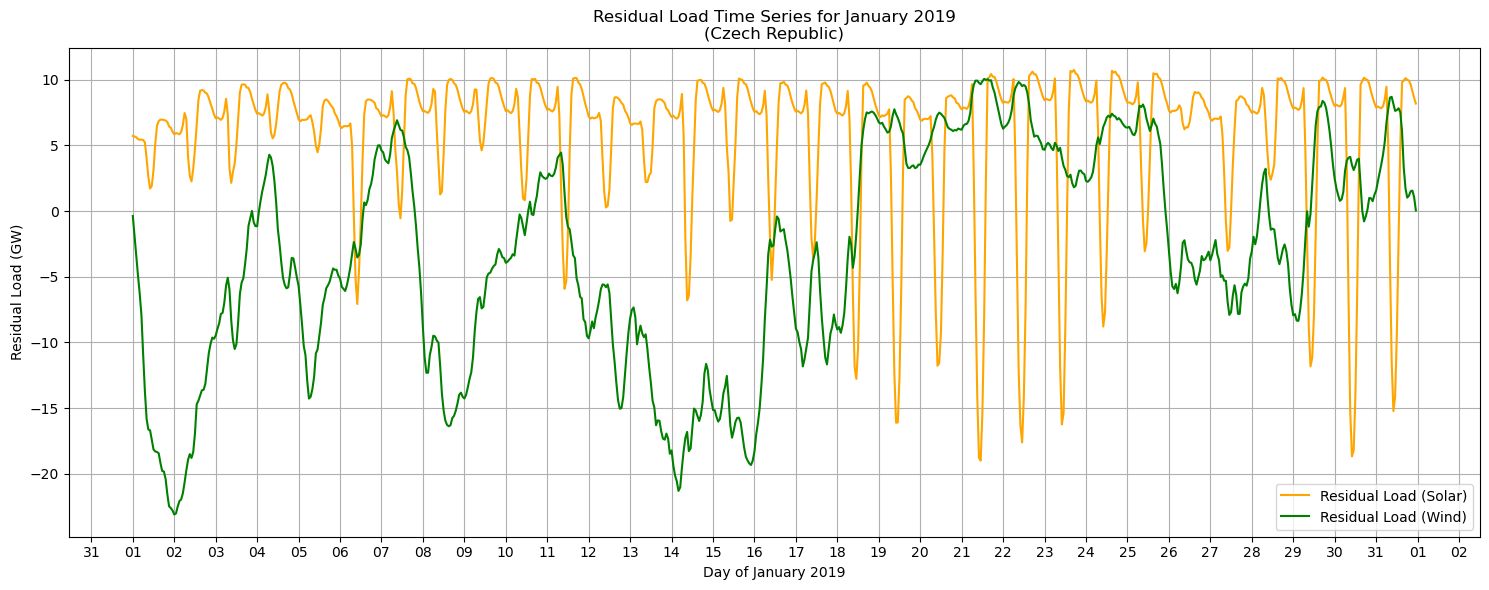

In [91]:
import matplotlib.dates as mdates
january_data = df.loc['2019-01']

plt.figure(figsize=(15, 6))
plt.plot(january_data.index, january_data['residual_solar'], label='Residual Load (Solar)', color='orange')
plt.plot(january_data.index, january_data['residual_wind'], label='Residual Load (Wind)', color='green')

# Set x-axis formatter to show day numbers only
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Major ticks at each day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))  # Format ticks as day numbers

plt.xlabel('Day of January 2019')
plt.ylabel('Residual Load (GW)')
plt.title('Residual Load Time Series for January 2019\n(Czech Republic)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [92]:
df['residual_total']= df['load_gw']-df['wind_gw']-df['solar_gw']

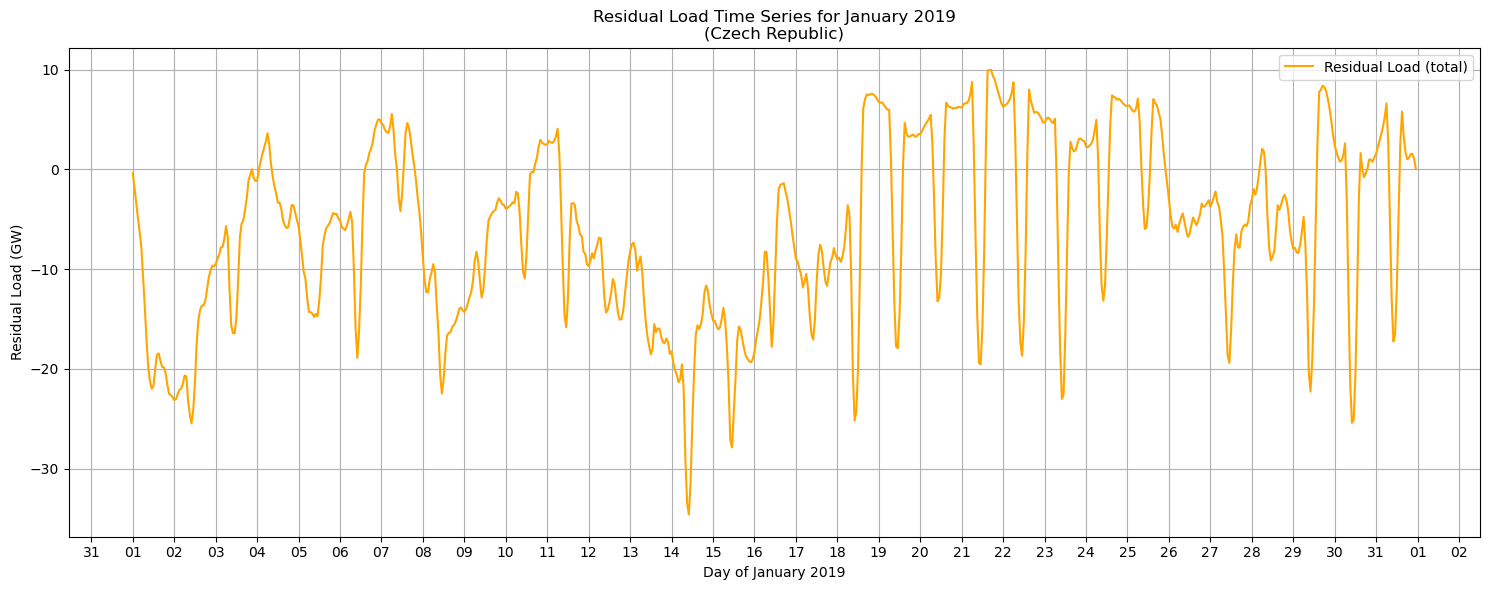

In [95]:
january_total_data = df.loc['2019-01']

plt.figure(figsize=(15, 6))
plt.plot(january_total_data.index, january_total_data['residual_total'], label='Residual Load (total)', color='orange')


# Set x-axis formatter to show day numbers only
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Major ticks at each day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))  # Format ticks as day numbers

plt.xlabel('Day of January 2019')
plt.ylabel('Residual Load (GW)')
plt.title('Residual Load Time Series for January 2019\n(Czech Republic)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [96]:
df['soc_solar'] = (-df['residual_solar']).cumsum()
df['soc_solar'] = df['soc_solar'] - df['soc_solar'].min()

In [99]:
df['soc_wind'] = (-df['residual_wind']).cumsum()
df['soc_wind'] = df['soc_wind'] - df['soc_wind'].min()

In [101]:
Min_solar_storage= df['soc_solar'].max()

In [103]:
Min_wind_storage= df['soc_wind'].max()

In [105]:
print("🔋 Min. required storage size for solar-only (GWh):", Min_solar_storage)
print("🔋 Min. required storage size for wind-only  (GWh):",Min_wind_storage)

🔋 Min. required storage size for solar-only (GWh): 14897.738357006245
🔋 Min. required storage size for wind-only  (GWh): 8780.998200364713


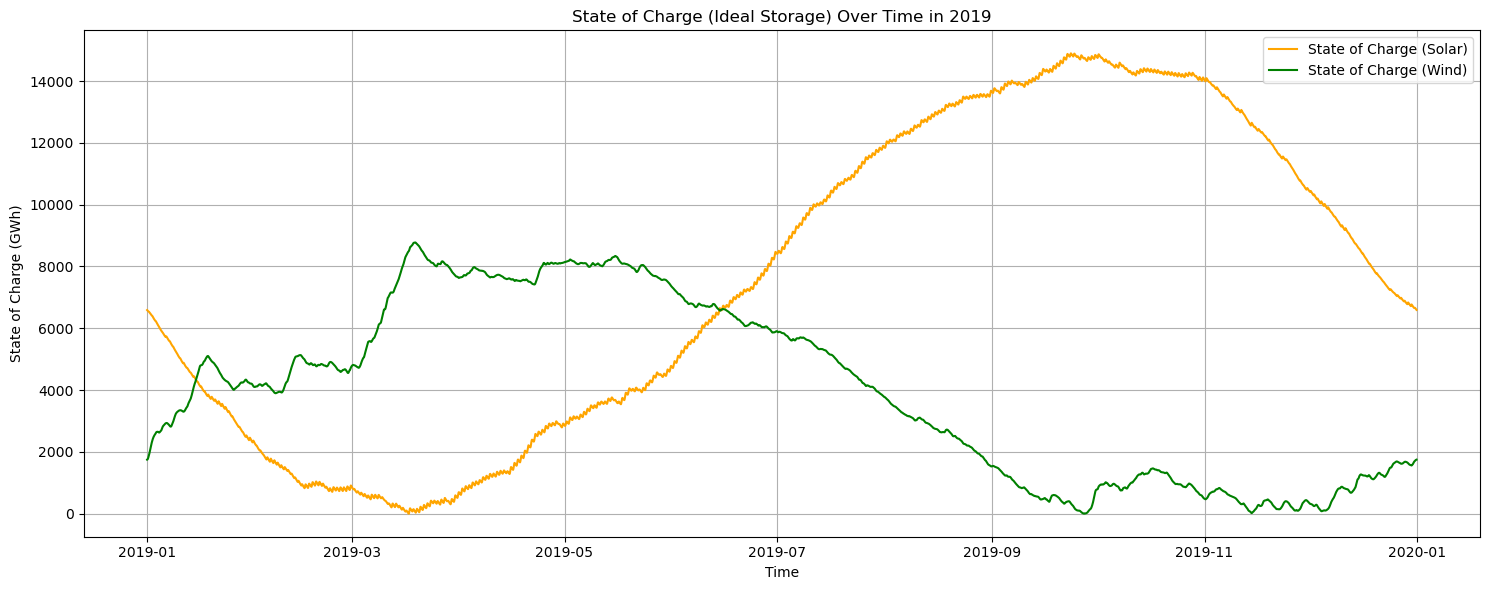

In [107]:
plt.figure(figsize=(15,6))
plt.plot(df.index, df['soc_solar'], label='State of Charge (Solar)', color='orange')
plt.plot(df.index, df['soc_wind'], label='State of Charge (Wind)', color='green')
plt.ylabel('State of Charge (GWh)')
plt.xlabel('Time')
plt.title('State of Charge (Ideal Storage) Over Time in 2019')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [109]:
charge_capacity_solar = -df['residual_solar'].min()
charge_capacity_wind = -df['residual_wind'].min()

# DISCHARGE capacity (GW) = largest positive residual (demand > generation)
discharge_capacity_solar = df['residual_solar'].max()
discharge_capacity_wind = df['residual_wind'].max()

# Print results
print("Solar-based system:")
print("🔋  Energy capacity (GWh)", round(Min_solar_storage, 2))
print("⚡ Max charge capacity (GW):", round(charge_capacity_solar, 2))
print("⚡ Max discharge capacity (GW):", round(discharge_capacity_solar, 2))

print("\nWind-based system:")
print("🔋 Energy capacity (GWh):", round(Min_wind_storage, 2))
print("⚡ Max charge capacity (GW):", round(charge_capacity_wind, 2))
print("⚡ Max discharge capacity (GW):", round(discharge_capacity_wind, 2))


Solar-based system:
🔋  Energy capacity (GWh) 14897.74
⚡ Max charge capacity (GW): 33.57
⚡ Max discharge capacity (GW): 10.75

Wind-based system:
🔋 Energy capacity (GWh): 8781.0
⚡ Max charge capacity (GW): 24.41
⚡ Max discharge capacity (GW): 10.07


In [111]:
def compute_residual(a,df):
    generation= a*df['solar_gw']+(1-a)*df['wind_gw']
    residual= df['load_gw'] - generation
    return residual 

In [128]:
alphas = np.arange(0,1.01,0.2)

In [130]:
residuals = pd.DataFrame(index=df.index)

In [132]:
for a in alphas:
    residuals[round(a,2)]= compute_residual(a,df)

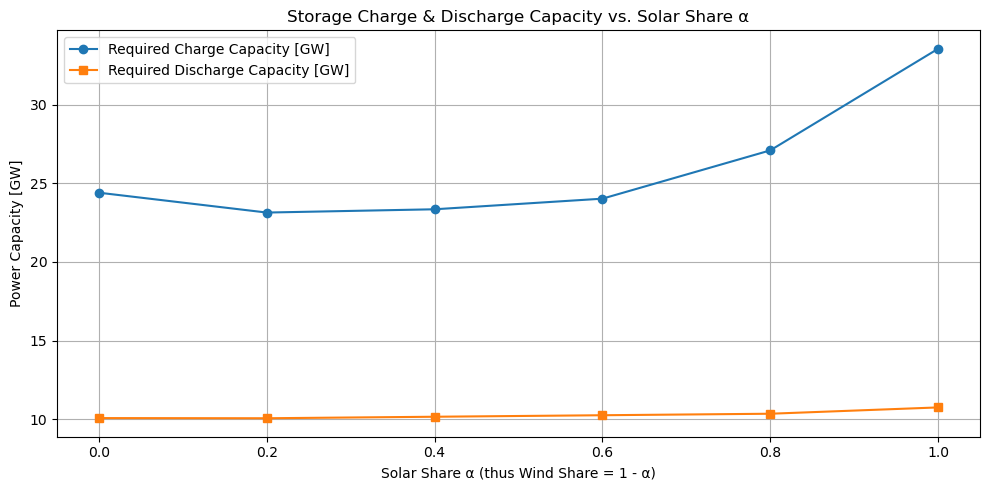

In [140]:



charge_capacities = []
discharge_capacities = []


for alpha in residuals.columns:
    residual = residuals[alpha]
    
    charge_capacity = abs(residual[residual < 0].min())  
    discharge_capacity = residual[residual > 0].max()   
    charge_capacities.append(charge_capacity)
    discharge_capacities.append(discharge_capacity)

# Plotting
plt.figure(figsize=(10, 5))
alphas = residuals.columns

plt.plot(alphas, charge_capacities, label='Required Charge Capacity [GW]', marker='o')
plt.plot(alphas, discharge_capacities, label='Required Discharge Capacity [GW]', marker='s')

plt.title('Storage Charge & Discharge Capacity vs. Solar Share α')
plt.xlabel('Solar Share α (thus Wind Share = 1 - α)')
plt.ylabel('Power Capacity [GW]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


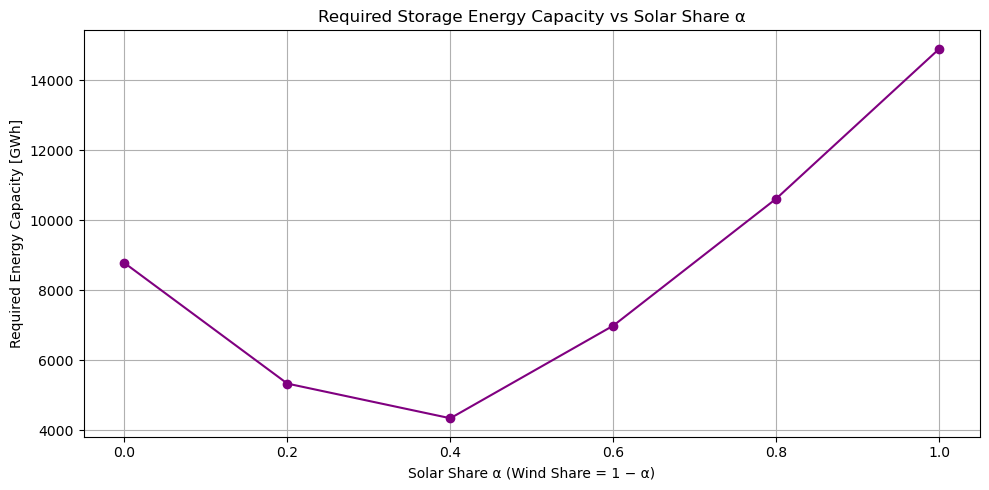

In [155]:

energy_capacities = []

dt = 1  # 1 hour time steps

for alpha in residuals.columns:
    residual = residuals[alpha]

    # Compute SoC time series
    soc = (-residual).cumsum() * dt  # GWh

    # Shift SoC so minimum is 0
    soc_shifted = soc - soc.min()

    # Maximum of shifted SoC is the required storage energy capacity
    max_energy = soc_shifted.max()
    energy_capacities.append(max_energy)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(residuals.columns, energy_capacities, marker='o', color='purple')
plt.title('Required Storage Energy Capacity vs Solar Share α')
plt.xlabel('Solar Share α (Wind Share = 1 − α)')
plt.ylabel('Required Energy Capacity [GWh]')
plt.grid(True)
plt.tight_layout()
plt.show()


In [157]:
alphas = np.array(residuals.columns)
energy_capacities = np.array(energy_capacities) 


min_index = energy_capacities.argmin()


optimal_alpha = alphas[min_index]
min_energy_capacity = energy_capacities[min_index]

print(f" Optimal solar share α = {optimal_alpha:.2f}")
print(f" Minimum required storage energy capacity = {min_energy_capacity:.2f} GWh")

 Optimal solar share α = 0.40
 Minimum required storage energy capacity = 4345.35 GWh


In [171]:
df.head(50)

,load_mw,pv_pu,wind_pu,load_gw,wind_gw,solar_gw,residual_solar,residual_wind,residual_total,soc_solar,soc_wind
timestamp,,,,,,,,,,,
2019-01-01 00:00:00,5719.26,0.000,0.1846,5.71926,6.093549,0.000000,5.719260,-0.374289,-0.374289,6589.988229,1749.742530
2019-01-01 01:00:00,5677.73,0.000,0.2293,5.67773,7.569073,0.000000,5.677730,-1.891343,-1.891343,6584.310499,1751.633873
2019-01-01 02:00:00,5622.20,0.000,0.2718,5.62220,8.971976,0.000000,5.622200,-3.349776,-3.349776,6578.688299,1754.983649
2019-01-01 03:00:00,5474.74,0.000,0.3146,5.47474,10.384782,0.000000,5.474740,-4.910042,-4.910042,6573.213559,1759.893691
2019-01-01 04:00:00,5432.51,0.000,0.3552,5.43251,11.724966,0.000000,5.432510,-6.292456,-6.292456,6567.781049,1766.186147
2019-01-01 05:00:00,5446.35,0.000,0.4055,5.44635,13.385343,0.000000,5.446350,-7.938993,-7.938993,6562.334699,1774.125140
2019-01-01 06:00:00,5413.39,0.000,0.4957,5.41339,16.362798,0.000000,5.413390,-10.949408,-10.949408,6556.921309,1785.074548
2019-01-01 07:00:00,5450.17,0.004,0.5808,5.45017,19.171904,0.223265,5.226905,-13.721734,-13.945000,6551.694405,1798.796282
2019-01-01 08:00:00,5449.62,0.026,0.6450,5.44962,21.291113,1.451224,3.998396,-15.841493,-17.292717,6547.696009,1814.637775


In [177]:



start_time = df.index[0].normalize()  # start of dataset, midnight
t = (df.index - start_time).total_seconds() / 3600
L = df['load_gw'].values
from scipy.interpolate import interp1d

load = interp1d(t, L, kind='cubic')  # 'linear' or 'cubic'

# Now you can get load at any time t (even fractional hours)
load(100.5)

array(6.96558355)

In [179]:
load_function(48)

array(7.06372)

<Axes: title={'center': 'Full Year Load'}, xlabel='timestamp'>

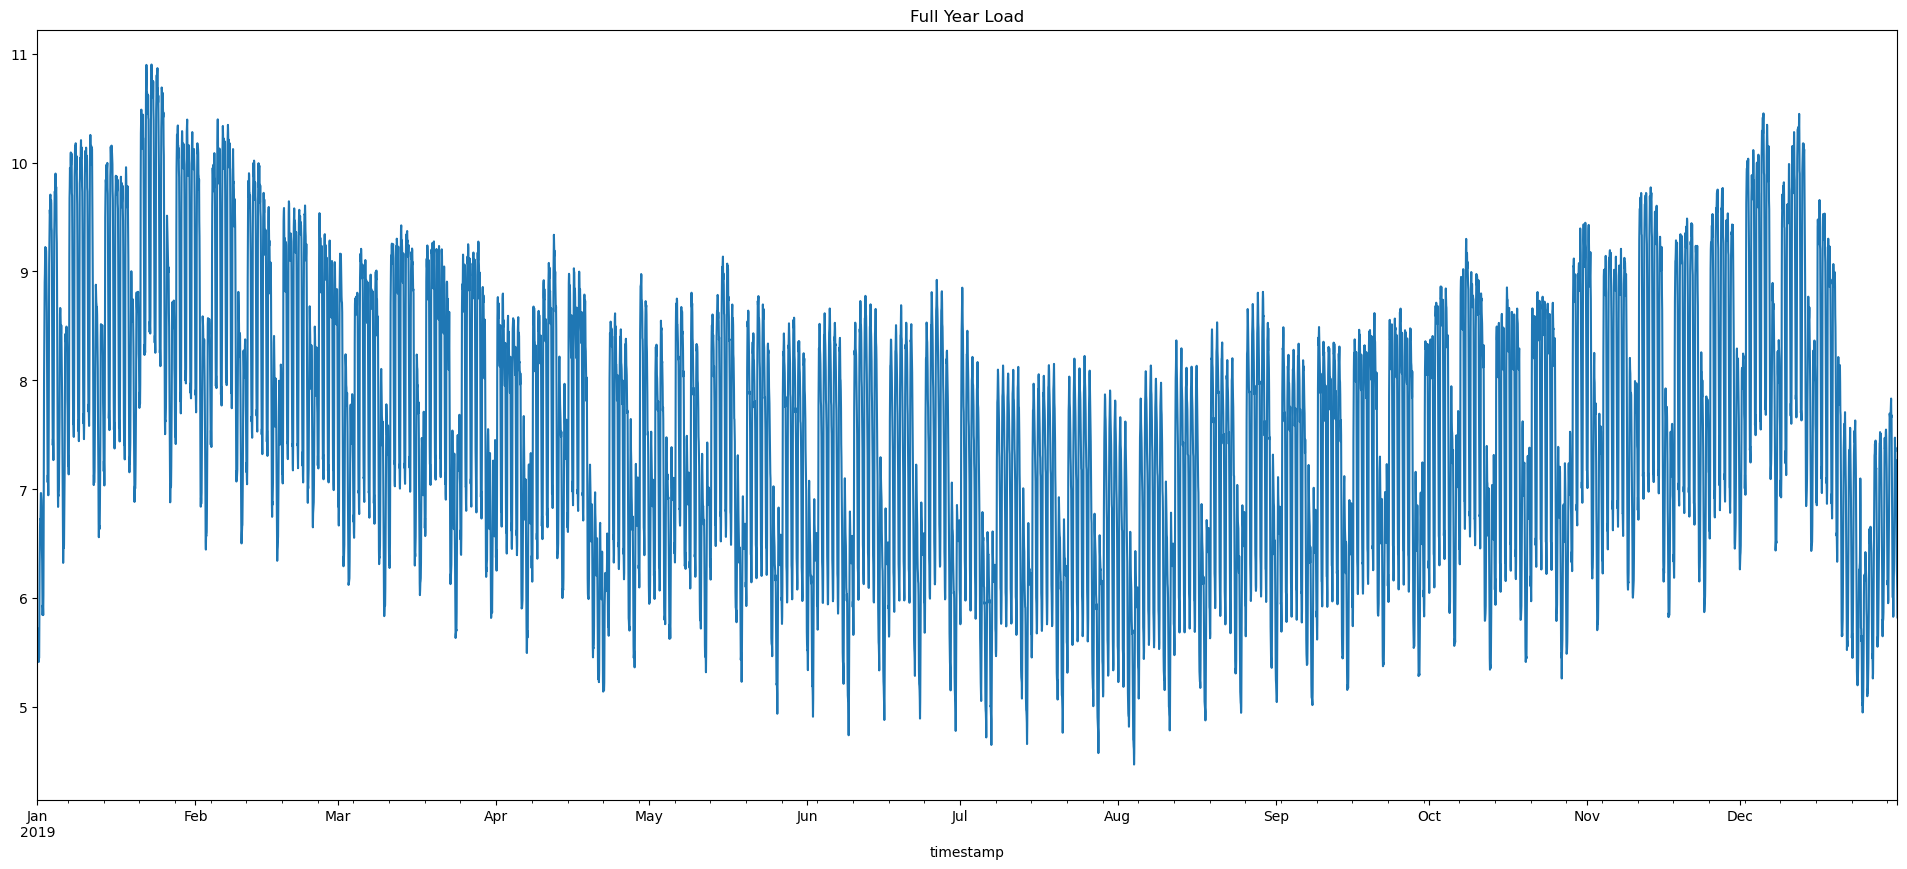

In [194]:
df['load_gw'].plot(figsize=(24, 10), title='Full Year Load')


<Axes: title={'center': 'Average Daily Load Profile'}, xlabel='Hour of Day', ylabel='Load (GW)'>

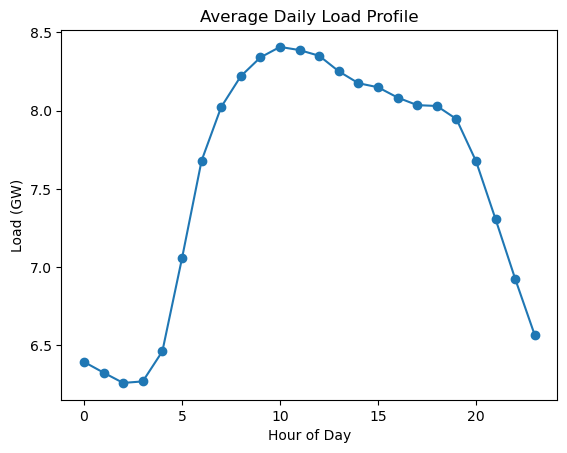

In [202]:
df['hour'] = df.index.hour
daily_profile = df.groupby('hour')['load_gw'].mean()

daily_profile.plot(marker='o', title='Average Daily Load Profile', xlabel='Hour of Day', ylabel='Load (GW)')

In [204]:
df['weekday'] = df.index.weekday  # 0=Monday, 6=Sunday
weekday_profile = df.groupby('weekday')['load_gw'].mean()

([<matplotlib.axis.XTick at 0x1e4092d7ce0>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

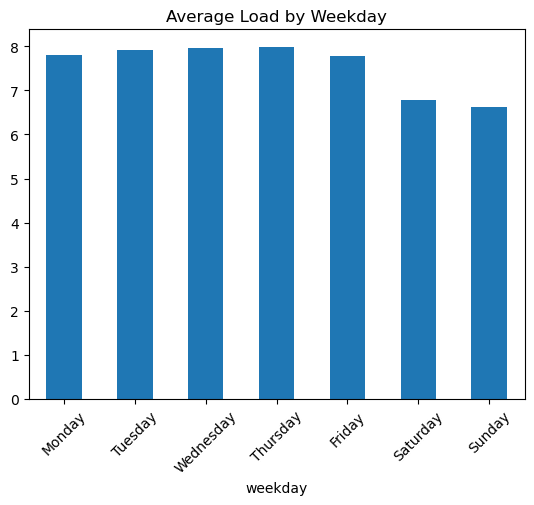

In [206]:
import calendar
labels = [calendar.day_name[i] for i in range(7)]

weekday_profile.plot(kind='bar', title='Average Load by Weekday')
plt.xticks(ticks=range(7), labels=labels, rotation=45)

<Axes: title={'center': 'Seasonal Load Pattern'}, xlabel='dayofyear'>

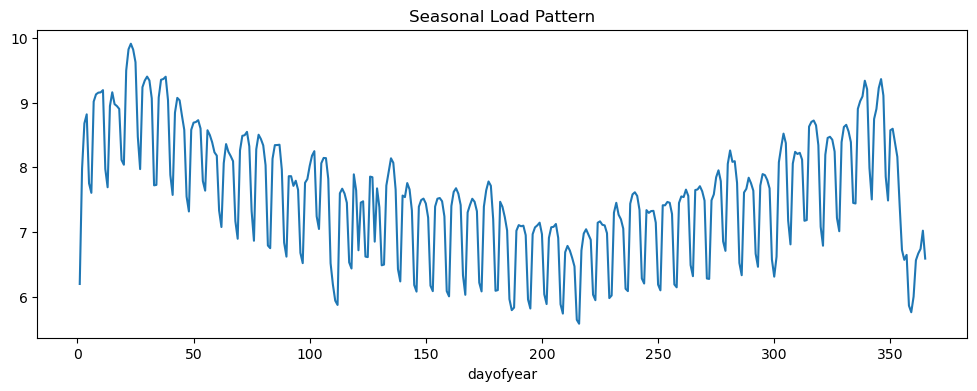

In [208]:
df['dayofyear'] = df.index.dayofyear
seasonal_profile = df.groupby('dayofyear')['load_gw'].mean()

seasonal_profile.plot(title='Seasonal Load Pattern', figsize=(12, 4))

<Axes: title={'center': 'Weekly Smoothed Load'}, xlabel='timestamp'>

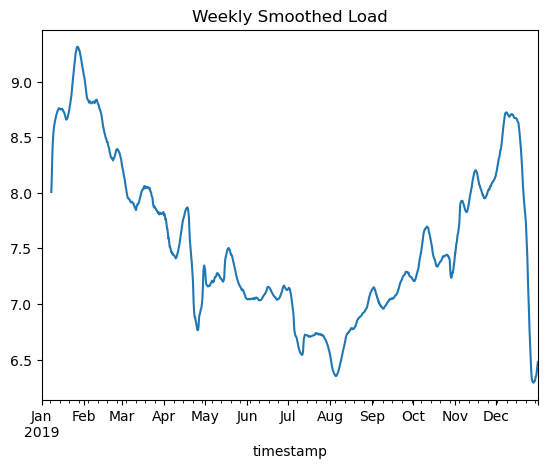

In [210]:
df['load_rolling'] = df['load_gw'].rolling(window=24*7).mean()  # 7-day rolling
df['load_rolling'].plot(title='Weekly Smoothed Load')
